<a href="https://colab.research.google.com/github/dAn-solution/competition/blob/main/Prob_kiva_029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kiva／クラウドファンディングの資金調達額予測
- CNN を実施
- [回帰：燃費を予測する](https://www.tensorflow.org/tutorials/keras/regression?hl=ja) 参照

### Google Driveのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'

Mounted at /content/drive
/content/drive/My Drive


### ライブラリのインストール、インポート

In [ ]:
# カレントディレクトリを変更
import os
os.chdir('/content/drive/My Drive/Probdata/kiva/')
print(os.getcwd())

/content/drive/My Drive/Probdata/kiva


In [ ]:
class Config():
    root_path = './'
    input_path = os.path.join(root_path, 'input')
    output_path = os.path.join(root_path, 'output')
    result_path = os.path.join(root_path, 'result')
    bert_model_name = 'bert-base-uncased'
    seed = 42
    constant = 25
    debug = False

In [ ]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers

### データの読み込み

In [ ]:
train_df = pd.read_csv(f'{Config.input_path}/train.csv')
test_df = pd.read_csv(f'{Config.input_path}/test.csv')
sample_df = pd.read_csv(f'{Config.input_path}/sample_submission.csv')

train_011_df = pd.read_csv(f'{Config.result_path}/train_011.csv')
test_011_df = pd.read_csv(f'{Config.result_path}/test_011.csv')
train_012_df = pd.read_csv(f'{Config.result_path}/train_012.csv')
test_012_df = pd.read_csv(f'{Config.result_path}/test_012.csv')
# train_013_df = pd.read_csv(f'{Config.result_path}/train_013.csv')
# test_013_df = pd.read_csv(f'{Config.result_path}/test_013.csv')
# train_014_df = pd.read_csv(f'{Config.result_path}/train_014.csv')
# test_014_df = pd.read_csv(f'{Config.result_path}/test_014.csv')
train_015_df = pd.read_csv(f'{Config.result_path}/train_015.csv')
test_015_df = pd.read_csv(f'{Config.result_path}/test_015.csv')
train_016_df = pd.read_csv(f'{Config.result_path}/train_016.csv')
test_016_df = pd.read_csv(f'{Config.result_path}/test_016.csv')
train_020_df = pd.read_csv(f'{Config.result_path}/train_020.csv')
test_020_df = pd.read_csv(f'{Config.result_path}/test_020.csv')

## CNNの実行

In [ ]:
target_column = "LOAN_AMOUNT"
y = train_df[target_column]

In [ ]:
# 合体
# X = pd.concat([train_011_df, train_012_df, train_013_df, train_014_df, train_015_df, train_016_df, train_020_df], axis=1)
# test_X = pd.concat([test_011_df, test_012_df, test_013_df, test_014_df, test_015_df, test_016_df, test_020_df], axis=1)
X = pd.concat([train_011_df, train_012_df, train_015_df, train_016_df, train_020_df], axis=1)
test_X = pd.concat([test_011_df, test_012_df, test_015_df, test_016_df, test_020_df], axis=1)

- modelの構築

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(300, activation='relu', input_dim=X.shape[1]),
    keras.layers.BatchNormalization(),
    layers.Dense(200, activation='relu'),
    keras.layers.BatchNormalization(),
    layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)

  model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               1800      
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

In [ ]:
example_batch = X[:10]
example_result = model.predict(example_batch)
example_result

array([[ 56.935528],
       [ 89.59634 ],
       [ 83.35957 ],
       [ 67.73675 ],
       [110.66252 ],
       [127.87848 ],
       [ 99.40046 ],
       [120.56101 ],
       [204.41852 ],
       [125.55285 ]], dtype=float32)

- modelの訓練

In [ ]:
EPOCHS = 1000
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')


In [ ]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示

# history = model.fit(
#   X_train, y_train,
#   epochs=EPOCHS, validation_split = 0.2, verbose=0,
#   callbacks=[PrintDot()])

In [ ]:
# mae
# print("mae = ", mean_absolute_error(y_oof[vl_idx], y_vl_fold))

In [ ]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
#   plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
#   plt.ylim([0,20])
  plt.legend()
  plt.show()


# plot_history(history)


...........

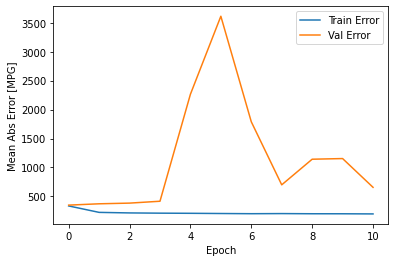

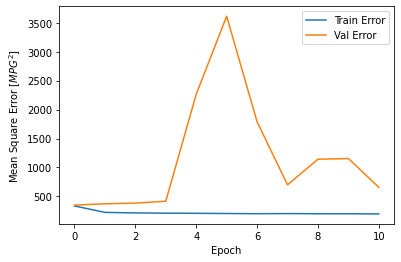

In [ ]:
model = build_model()

# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X, y, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
# loss, mae = model.evaluate(X_test, y_test, verbose=2)

# print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

− modelを使った予測

In [ ]:
train_predictions = model.predict(X).flatten()
test_predictions = model.predict(test_X).flatten()

In [ ]:
print(train_predictions.shape)
print(test_predictions.shape)

(91333,)
(91822,)


In [ ]:
print(mean_absolute_error(train_predictions, y))

316.96206510077167


In [ ]:
# メタモデルへの引き渡し
train_029_df = pd.DataFrame(train_predictions)
train_029_df.to_csv(os.path.join(Config.result_path, "train_029.csv"), index=False)

test_029_df = pd.DataFrame(test_predictions)
test_029_df.to_csv(os.path.join(Config.result_path, "test_029.csv"), index=False)

### 提出データの作成

In [ ]:
for i in range(len(test_predictions)):
    a, b = divmod(test_predictions[i], Config.constant)
    if b > (Config.constant/2):
        b = 1
    else:
        b = 0
    test_predictions[i] = (a + b) * Config.constant

In [ ]:
sample_df["LOAN_AMOUNT"] = test_predictions
print(sample_df)

       LOAN_ID  LOAN_AMOUNT
0      2041445        525.0
1      1944435        600.0
2      2083354        425.0
3      1993565        725.0
4      2064272        300.0
...        ...          ...
91817  1993862        400.0
91818  2015070        325.0
91819  1950349        675.0
91820  1921580       1425.0
91821  1976733        575.0

[91822 rows x 2 columns]


In [ ]:
# submitファイルのファイル名に利用する作成時刻の取得

now = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=1)))
date_time = "{0:%Y%m%d_%H%M}".format(now)

In [ ]:
# submitファイルの出力(Google Driveに出力）
# 形式：submit_yyyymmdd_hhmm.csv

sample_df.to_csv(os.path.join(Config.output_path, f"submit_{date_time}.csv"), index=False)


In [ ]:
date_time

'20220129_0855'